County Voting Data From https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi%3A10.7910%2FDVN%2FVOQCHQ

In [1]:
# Input Information
COLLEGE = "Harvard"
START_YEAR = 2012
END_YEAR = 2020

In [17]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
# Read CSV Files
df = pd.read_csv('../data/College Records - college-counties.csv')
cvd = pd.read_csv('../data/countypres_2000-2020.csv')

In [4]:
# Clean input data to remove nulls and reset index
df = df.dropna()
df.reset_index(drop=True, inplace=True)

In [5]:
# Merge liberal and conservative votes in County Votng Data
cvd = cvd[cvd['party']!="OTHER"]
cvd = cvd.reset_index(drop=True)
PARTY_REPLACEMENTS = {"LIBERAL": ["DEMOCRAT", "GREEN"], "CONSERVATIVE": ["REPUBLICAN", "LIBERTARIAN"]}
for party, replacements in PARTY_REPLACEMENTS.items():
    cvd.loc[cvd['party'].isin(replacements), 'party'] = party
grouped = cvd.groupby(['year','state','county_name', 'party', 'totalvotes'], as_index=False)
cvd = grouped.agg({'candidatevotes':'sum'})

In [6]:
college_row = df.loc[df['College'] == COLLEGE]
college_row = college_row.reset_index(drop=True)
# Average scores for each election cycle
years = []
polarity_scores = {}
total = 0
for i in range(START_YEAR, END_YEAR+1):
    if i % 4 == 0 and i != START_YEAR:
        polarity_scores[i] = total/4
        years.append(i)
        total = 0
    total += college_row[str(i)][0]

In [7]:
# Get county data for college
county = college_row['County'][0].upper()
state = college_row['State'][0].upper()
cvd.reset_index(drop=True, inplace=True)
county_data = cvd.loc[(cvd['county_name'] == county) & (cvd['state'] == state)]
county_data.reset_index(drop=True, inplace=True)
county_data = county_data[county_data['year'].isin(range(START_YEAR+4, END_YEAR+1, 4))]
county_data.reset_index(drop=True, inplace=True)

In [8]:
percents_liberal = {}
percents_conservative = {}
for row in county_data.iterrows():
    if row[1]['party'] == "LIBERAL":
        percents_liberal[row[1]['year']] = row[1]['candidatevotes']/row[1]['totalvotes']
    elif row[1]['party'] == "CONSERVATIVE":
        percents_conservative[row[1]['year']] = row[1]['candidatevotes']/row[1]['totalvotes']

In [9]:
plot_df = pd.DataFrame(columns=['Year', 'Liberal Vote Percent', 'Conservative Vote Percent', 'Polarity Score'])
for year in years:
    plot_df.loc[len(plot_df.index)] = [
        year,
        percents_liberal[year], 
        percents_conservative[year], 
        polarity_scores[year]
    ]

<Axes: xlabel='Polarity Score', ylabel='Liberal Vote Percent'>

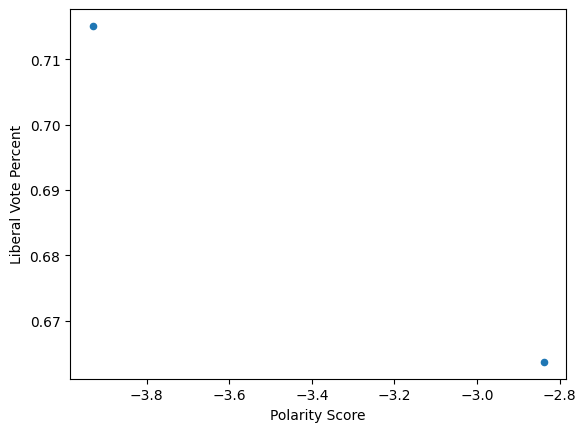

In [10]:
# Plot
plot_df.plot.scatter(x="Polarity Score", y="Liberal Vote Percent")

In [19]:
x = plot_df[['Polarity Score']]
y = plot_df['Liberal Vote Percent']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
model.summary()

d:\ASDRP\diversity-colleges\.venv\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
d:\ASDRP\diversity-colleges\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
d:\ASDRP\diversity-colleges\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1794: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
d:\ASDRP\diversity-colleges\.venv\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Liberal Vote Percent   R-squared:                       1.000
Model:                              OLS   Adj. R-squared:                    nan
Method:                   Least Squares   F-statistic:                       nan
Date:                  Sun, 16 Jul 2023   Prob (F-statistic):                nan
Time:                          17:30:55   Log-Likelihood:                 67.803
No. Observations:                     2   AIC:                            -131.6
Df Residuals:                         0   BIC:                            -134.2
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5301        inf          0        nan         nan         nan
Polarity Score    -0.0471        inf         -0        nan         nan         nan
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.118
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.333
Skew:                           0.000   Prob(JB):                        0.846
Kurtosis:                       1.000   Cond. No.                         23.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""